В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [3]:
import numpy as np
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

In [52]:
# Let's declare the heights list
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

In [53]:
# Checking the number of items to ensure that we can use the Z-test
len (heights)

33

In [13]:
# Our expectation about the average student's height
mean_height = 170

In [66]:
# Let's use the Z-test to find the statistical difference
z_stat, p_value = ztest(heights, value=mean_height, alternative='larger')
print(f"Z-Score: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nWe reject the null hypothesis. The average height is significantly greater than 170 cm.")
else:
    print("\nWe fail to reject the null hypothesis. There is not enough evidence to say the average height is greater than 170 cm.")

Z-Score: 0.8482
P-value: 0.1982

We fail to reject the null hypothesis. There is not enough evidence to say the average height is greater than 170 cm.


### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [12]:
# Let's declare the scores for groups A and B
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

In [13]:
# Let's use the Z-test to find the statistical difference
z_stat, p_value = ztest(group_a_scores, group_b_scores, alternative='larger')

print(f"Z-Score: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nWe reject the null hypothesis. The groups are significantly different. The new course is better")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant difference between the groups.  We cannot draw conclusions about the quality of the course.")

Z-Score: 2.3574
P-value: 0.0092

We reject the null hypothesis. The groups are significantly different. The new course is better


**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть t-test (для цього використовуємо наступний [метод](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)). Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

Тут проводимо t-test оскільки одна з вибірок - дуже мала.

In [14]:
from scipy.stats import ttest_ind

In [16]:
# Let's declare a list of the first 5 students and use ttest_ind to find the statistical difference
group_a_scores_first_5 = group_a_scores[:5]
_, p_value = ttest_ind(group_a_scores_first_5, group_b_scores, equal_var=False)

print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nWe reject the null hypothesis. The groups are significantly different. The new course is better")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant difference between the groups.  We cannot draw conclusions about the quality of the course.")

P-value: 0.3011

We fail to reject the null hypothesis. There is no significant difference between the groups.  We cannot draw conclusions about the quality of the course.


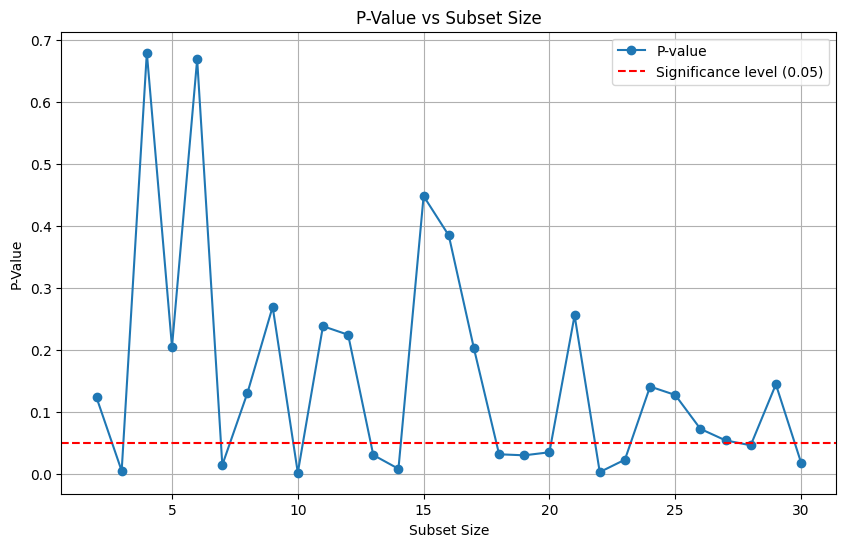

In [56]:
# As a bonus, let's investigate the relationship between the p-value and subset sizes for group A and the whole group B. We will visualize that
subset_sizes = range(1, 31)
p_values = []

for i in subset_sizes:
    np.random.seed() #random subsets each time
    subset_a = np.random.choice(group_a_scores, i, replace=False)
    _, p_value = ttest_ind(subset_a, group_b_scores, equal_var=False)
    p_values.append(p_value)

plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, p_values, marker='o', linestyle='-', label='P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.title('P-Value vs Subset Size')
plt.xlabel('Subset Size')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.show()

### So,  Subset Size Matters:
- The p-values fluctuate significantly for smaller subset sizes (1–10).
- The subset size increases (10–30), the p-values tend to stabilize and drop below the significance threshold (0.05).



### Завдання 3\*: Z-тест для двох **пов'язаних** вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників, коли всі співробітники проходили тренінг.

**Припущення**: Наші працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

Зверніть увагу, ці вибірки повʼязані між собою, значить не буде коректно виконати z-test між ними, натомість, ми можемо порівняти, чи різниця в результатах (продуктивності співробітників) є стат значущою.

In [5]:
# Let's declare the scores for the group before and after training
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

In [7]:
# Calculating the difference values for each person using numpy
diff = np.array(after_training) - np.array(before_training)

In [8]:
diff

array([ 4.65,  3.03,  5.9 ,  2.47,  8.44,  4.26,  1.29,  0.86,  3.97,
        2.55,  4.42,  3.94,  2.85,  1.3 , -0.03,  2.11,  4.71,  3.42,
        0.51,  3.35,  3.77,  1.23,  3.31,  3.11,  0.72,  3.72,  4.12,
        5.17,  5.11,  0.24])

In [9]:
# Stating our expectation about the difference
expected_diff = 0

In [18]:
# Let's use the one-sample Z-test to find the statistical difference in productivity before and after
z_stat, p_value = ztest(diff, value=expected_diff, alternative='larger')
print(f"Z-Score: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nWe reject the null hypothesis. Workers are significantly more productive after training.")
else:
    print("\nWe fail to reject the null hypothesis. There is not enough evidence to conclude that productivity has increased.")

Z-Score: 9.1389
P-value: 0.0000

We reject the null hypothesis. Workers are much productive after training
